/home/malek
type of atlas image <class 'numpy.ndarray'>
shape of atlas image (128, 128)
type of ixi image <class 'numpy.ndarray'>
shape of ixi image (233, 197)


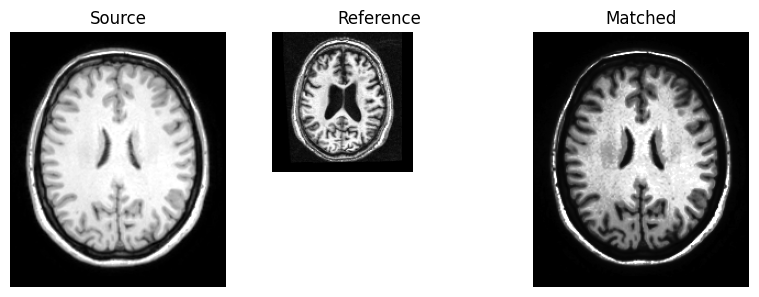

In [2]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms
from PIL import Image
import os 
import sys
import numpy as np
os.chdir('/home/malek/autoDDPM')
dir_path = os.path.dirname(os.path.realpath(os.getcwd()))


# Get the parent directory
# Add the parent directory to the system path
sys.path.append(dir_path)
print(dir_path)

for i in range(304, 305):
    image_atlas_path = f'./data/ATLAS/png_128_sl_95/Atlas_train_/Atlas_train_{i}.png'
    image_atlas = Image.open(image_atlas_path)
    image_atlas = np.array(image_atlas)


    print('type of atlas image', type(image_atlas))
    print('shape of atlas image', image_atlas.shape)


    image_ixi_path = './data/CAPS_IXI/png/sub-IXI002_ses-M00_T1w_space-MNI152NLin2009cSym_res-1x1x1_T1w.png'
    image_ixi = Image.open(image_ixi_path)
    image_ixi = np.array(image_ixi)


    print('type of ixi image', type(image_ixi))
    print('shape of ixi image', image_ixi.shape)


    matched = match_histograms(image_ixi, image_atlas)

    fig, (ax1, ax2, ax3) = plt.subplots(
        nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True
    )
    for aa in (ax1, ax2, ax3):
        aa.set_axis_off()

    ax1.imshow(image_ixi,cmap='gray')
    ax1.set_title('Source')
    ax2.imshow(image_atlas,cmap='gray')
    ax2.set_title('Reference')
    ax3.imshow(matched,cmap='gray')
    ax3.set_title('Matched')

    plt.tight_layout()
    plt.show()

# bringing Atlas to MNI space

In [9]:

os.chdir('/home/malek/autoDDPM')
dir_path = os.path.dirname(os.path.realpath(os.getcwd()))


# Get the parent directory
# Add the parent directory to the system path
sys.path.append(dir_path)
print(dir_path)
import matplotlib.pyplot as plt

from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms
from PIL import Image
import os 
import sys
import numpy as np
from transforms.preprocessing import Pad
import torchvision.transforms as transforms
import torch



def harmonize_atlas_to_mni(i):
    image_atlas_path = f'./data/ATLAS/png_128_sl_95/Atlas_train_/Atlas_train_{i}.png'
    image_atlas = Image.open(image_atlas_path)
    image_atlas = np.array(image_atlas)


    print('type of atlas image', type(image_atlas))
    print('shape of atlas image', image_atlas.shape)


    mni_reference_path = '/home/malek/autoDDPM/data/MNI152_template/mni_95_slice_template.png'
    image_mni = Image.open(mni_reference_path)
    image_mni = np.array(image_mni)
    image_mni = image_mni[:,:,1]

    pad = Pad()
    resize = transforms.Resize([128,128])

    image_mni = pad(torch.tensor(image_mni))
    image_mni = resize(image_mni.unsqueeze(0)).squeeze(0)
    image_mni = image_mni.numpy()

    print('type of mni image', type(image_mni))
    print('shape of mni image', image_mni.shape)

    matched = match_histograms(image_atlas, image_mni)

    fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True
    )
    for aa in (ax1, ax2, ax3):
        aa.set_axis_off()

    
    

    ax1.imshow(image_mni,cmap='gray')
    ax1.set_title('Reference')
    ax2.imshow(image_atlas,cmap='gray')
    ax2.set_title('Source')
    ax3.imshow(matched,cmap='gray')
    ax3.set_title('Matched')
    fig.savefig(f'./generated_figures/generated_figure{i}.png')

    plt.tight_layout()
    plt.show()

/home/malek


In [11]:
import time
from IPython.display import clear_output
for i in range(200,300):
    harmonize_atlas_to_mni(i)    
    #time.sleep(2)
    clear_output()